# Petrophysics with Petrolib

In [1]:
%pip install petrolib #Install package


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
#load package
import pandas as pd
from pathlib import Path
from warnings import filterwarnings
from matplotlib import pyplot as plt
filterwarnings('ignore')

from data.file_reader import load_las
from data.procs import process_data, set_alias, trim
from data.stats import displayFreq, Correlation
from visualization.interp import crossPlot, picketPlot
from visualization.plot import plotLoc, plotLog, tripleCombo, Zonation, plotLogFacies
from petro.workflow import Quanti

In [178]:
# load well log data and well tops 
well_path = Path(r"./15_9-F-1A.LAS")
tops_path = Path(r"./contact.csv")

df, las = load_las(well_path, return_csv=True, curves=['GR', 'RT', 'NPHI', 'RHOB'])

#reset index
df = df.dropna().reset_index()
df.head()

,DEPTH,GR,RT,NPHI,RHOB
0,2605.0,30.4854,1.1329,0.2388,2.2693
1,2605.1,30.1583,1.0648,0.1985,2.3208
2,2605.2,32.5094,1.0538,0.1761,2.3443
3,2605.3,38.9545,1.0523,0.1691,2.3499
4,2605.4,53.1555,0.9912,0.1764,2.3484


In [4]:
# setting mnemonics / alias to maintain convention
df = set_alias(df, 'DEPT', 'GR', 'RESD', 'NEUTRON', 'DENSITY')
df.head()

,DEPTH,GR,RT,NPHI,RHOB
0,1131.5700,85.55,NaN,NaN,NaN
1,1131.7224,87.72,NaN,NaN,NaN
2,1131.8748,89.34,NaN,NaN,NaN
3,1132.0272,90.43,1.2900,NaN,NaN
4,1132.1796,90.61,1.3233,NaN,NaN


In [8]:
#processing the data of arbitrary values
df = process_data(df, 'GR', 'RT', 'NPHI', 'RHOB')
df.describe()

,DEPTH,GR,RT,NPHI,RHOB
count,10524.000000,10524.000000,10524.000000,10524.000000,10524.000000
mean,3131.150000,41.334615,3.883314,0.169270,2.482333
std,303.816145,37.499821,28.402160,0.097015,0.140250
min,2605.000000,1.041600,0.200000,0.029000,1.980600
25%,2868.075000,11.750500,1.322600,0.103300,2.404975
50%,3131.150000,33.387000,2.874650,0.144050,2.535800
75%,3394.225000,51.638975,4.252050,0.214200,2.583100
max,3657.300000,150.000000,2000.000000,0.450000,2.931500


# Plots

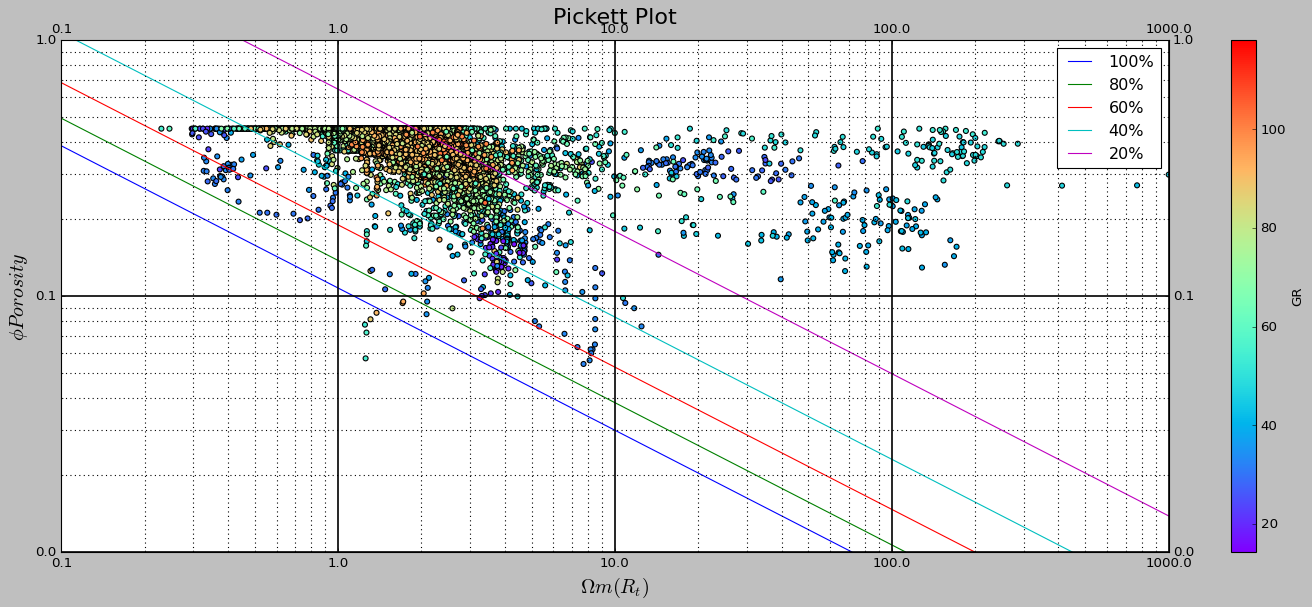

In [83]:
plt.style.use('classic')
picketPlot(df, color_code='num', hue='GR', cmap='rainbow')

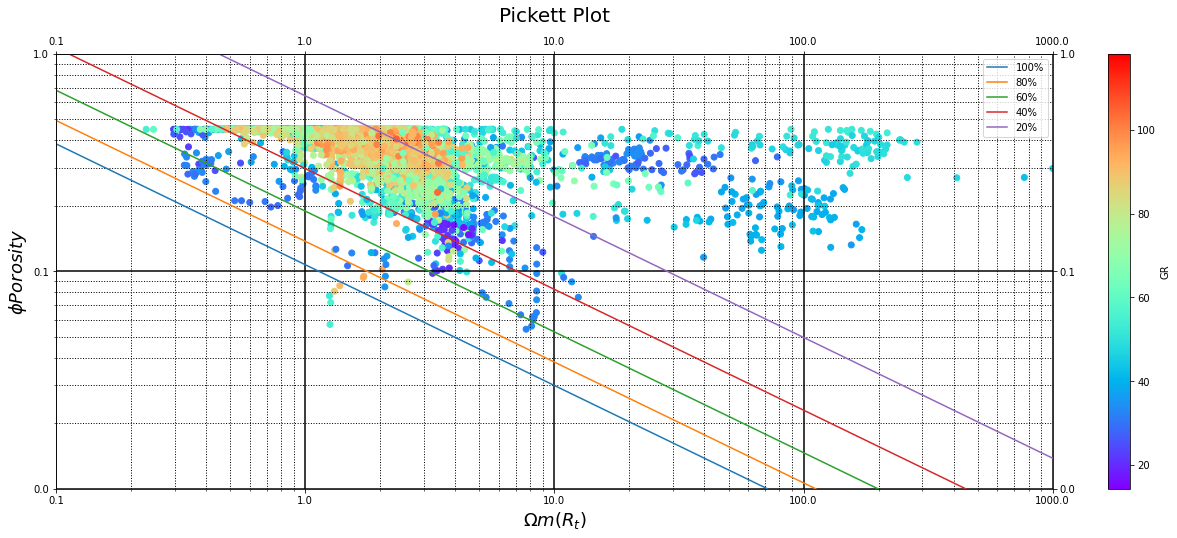

In [10]:
picketPlot(df, color_code='num', hue='GR', cmap='rainbow')

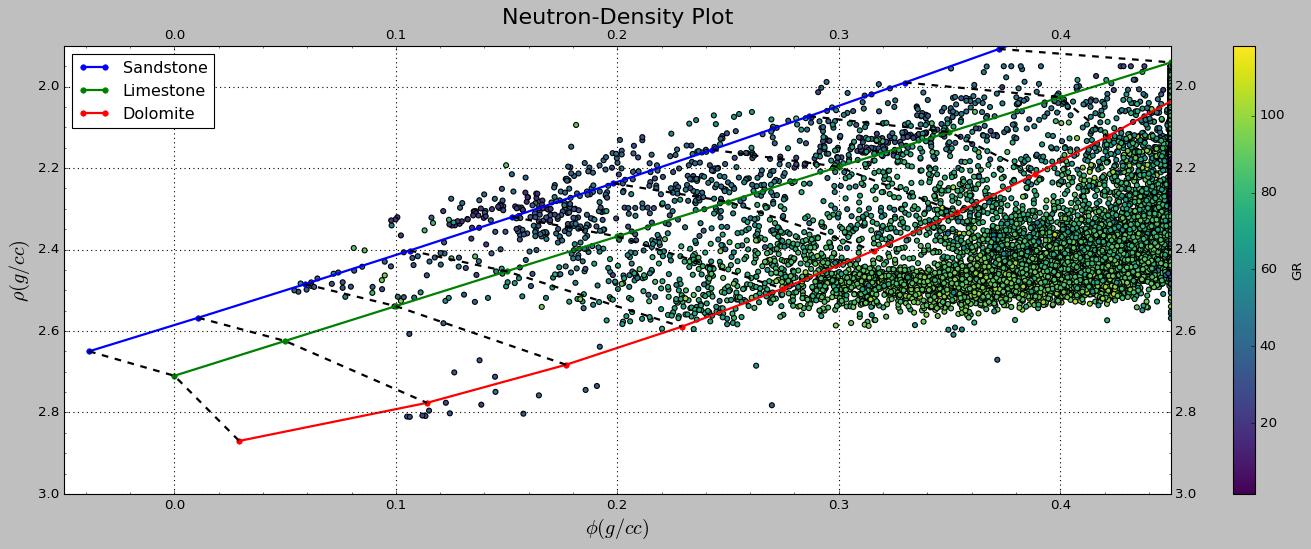

In [85]:
plt.style.use('classic')
crossPlot(df, 'NPHI', 'RHOB', color_code='num', hue='GR')

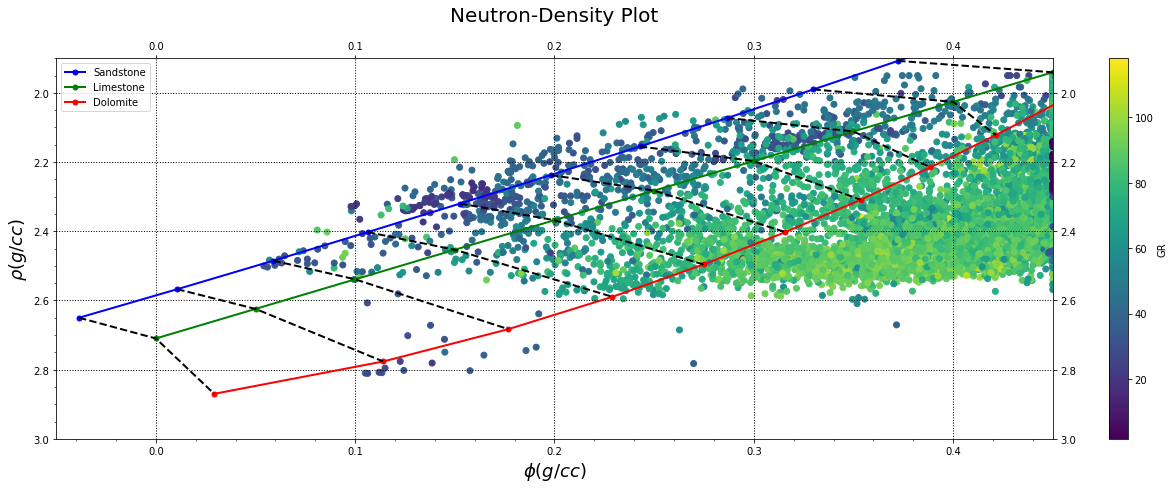

In [9]:
crossPlot(df, 'NPHI', 'RHOB', color_code='num', hue='GR')

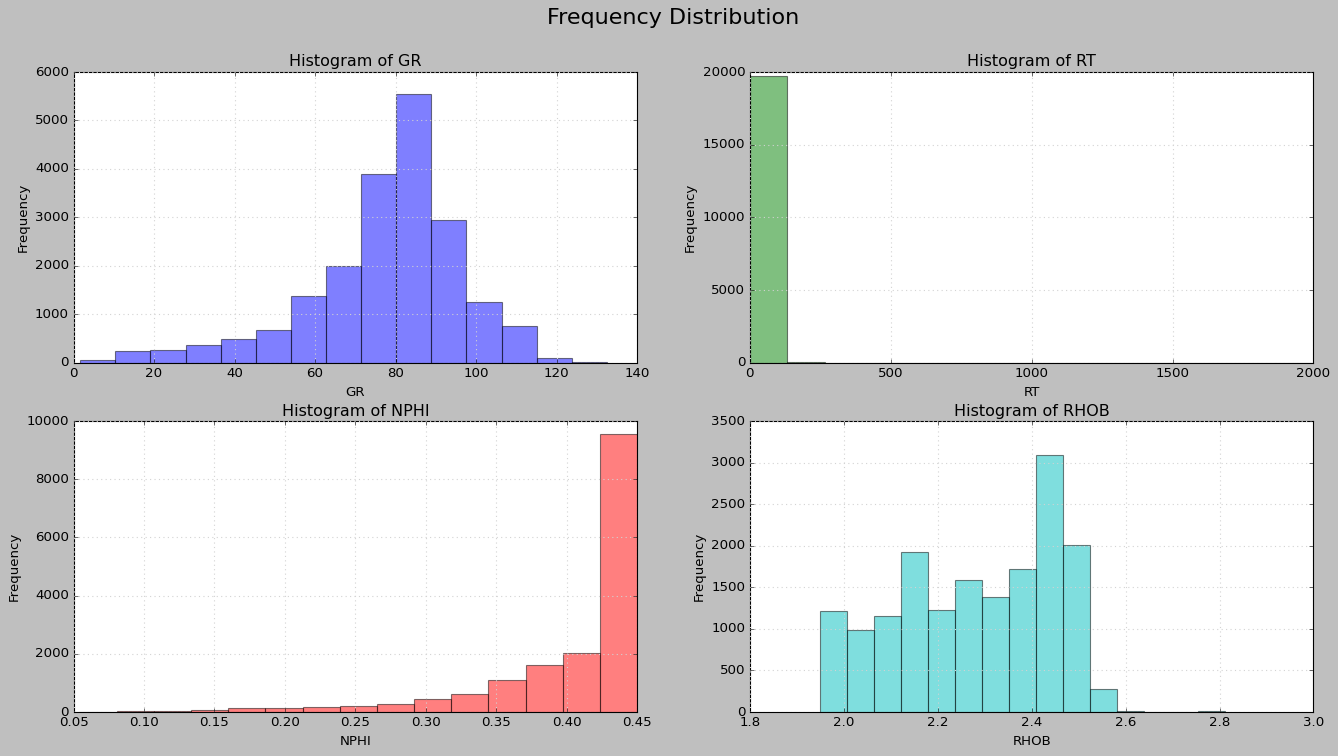

In [86]:
displayFreq(df, 'GR', 'RT', 'NPHI', 'RHOB',  bins=15, figsize=(20,10))

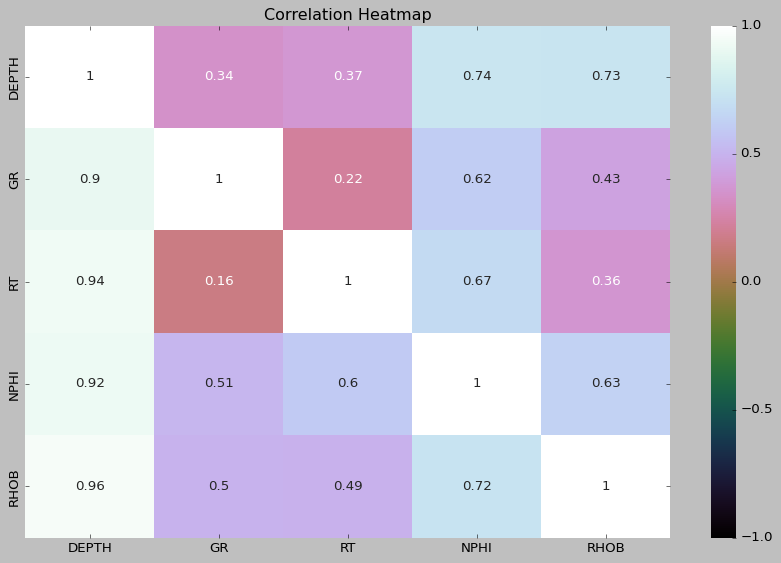

In [13]:
#chatterjee method of correlation
plt.style.use('classic')
corr = Correlation(df)
v = corr.corr(method='chatterjee')

corr.plot_heatmap(figsize=(13,8), cmap='cubehelix')

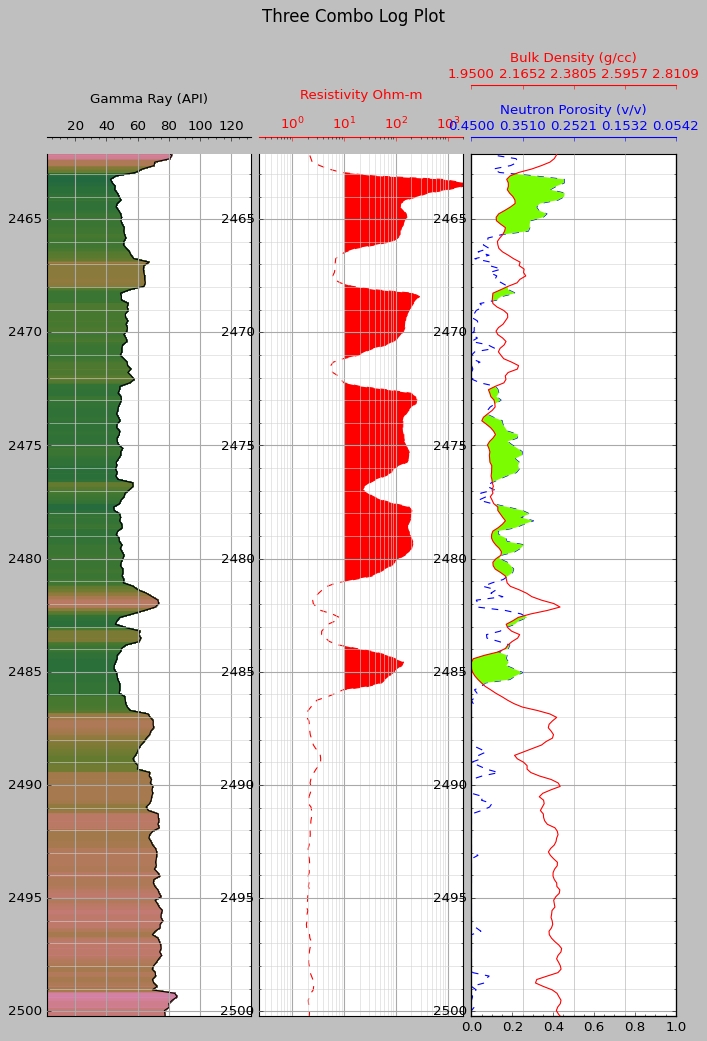

In [87]:
tripleCombo(df, 'DEPTH', 'GR', 'RT', 'NPHI', 'RHOB', ztop=2462.11, zbot=2500.19,
            res_thres=10, fill='left', palette_op='cubehelix', limit='left', figsize=(9, 13))

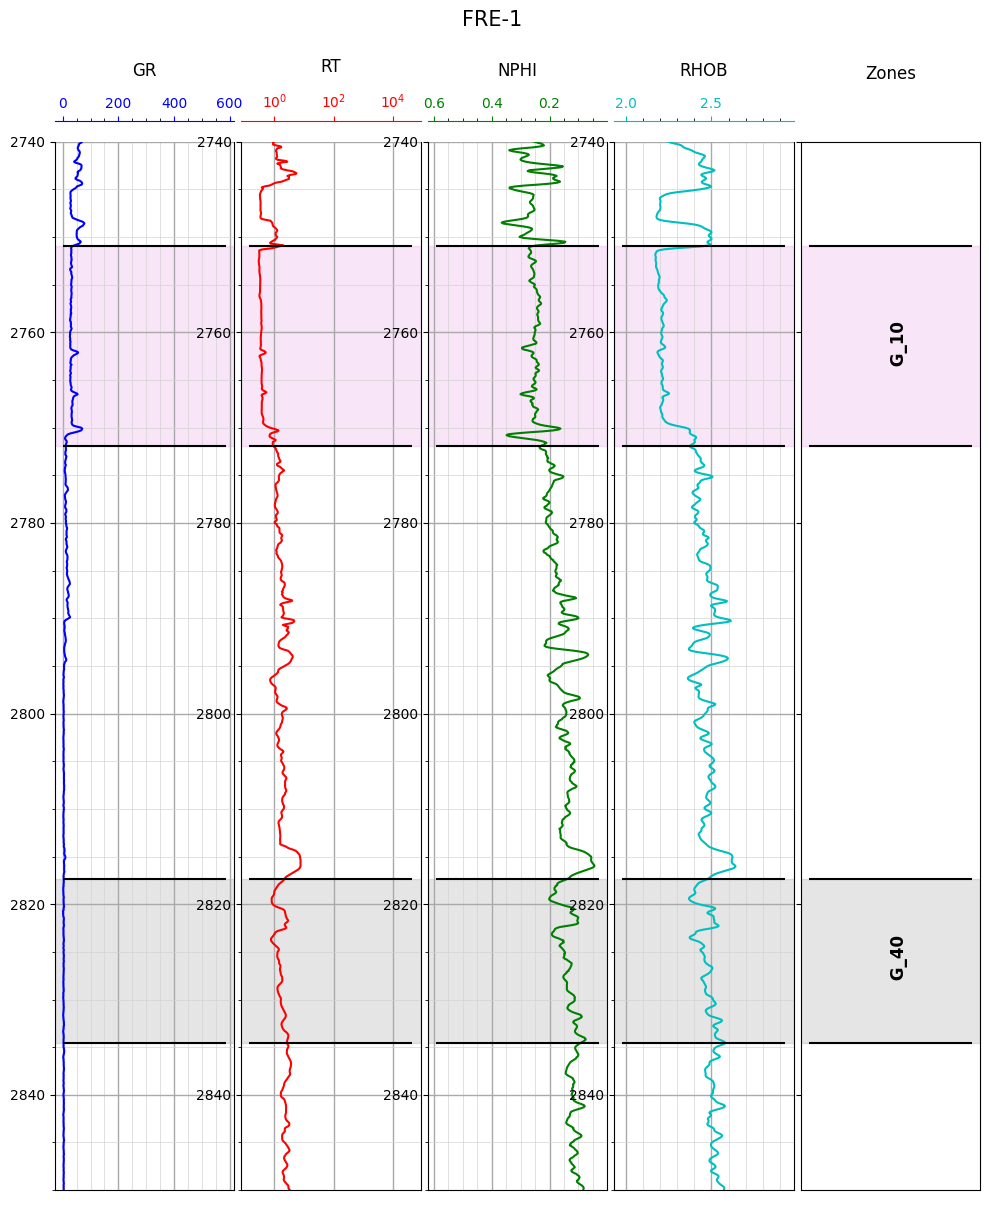

In [179]:
#loading well tops
zones = Zonation(df, path=tops_path)
ztop, zbot, zn, fm = zones()

zones.plotZone('DEPTH', ['GR', 'RT', 'NPHI', 'RHOB'], 2740, 2850, 'FRE-1 ', figsize=(10, 12))

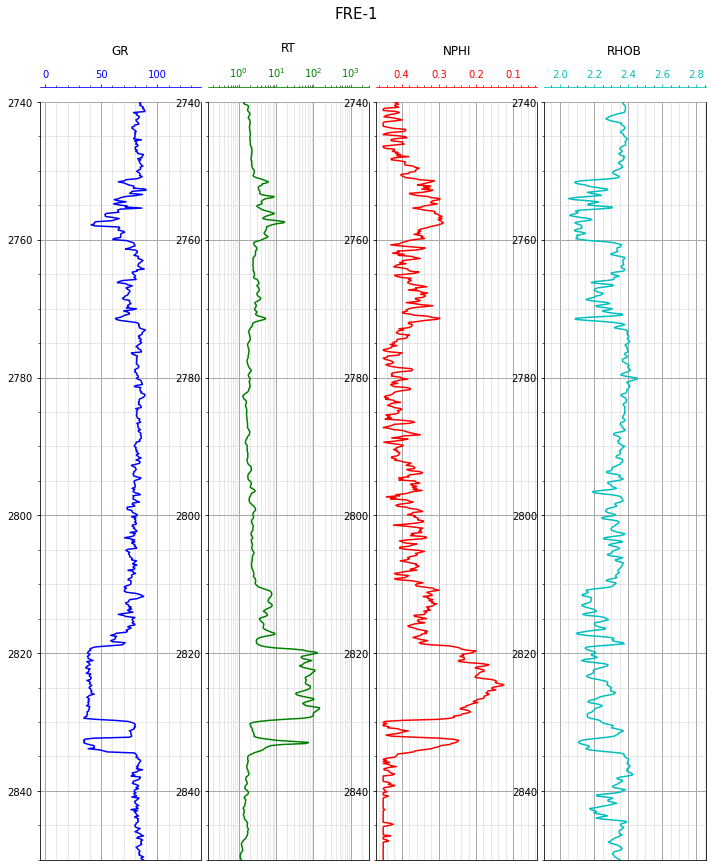

In [7]:
plotLog(df, depth='DEPTH', logs=['GR', 'RT', 'NPHI', 'RHOB'], top=2740, bottom=2850, title='FRE-1', figsize=(10,12) )

# Petrophysics

In [41]:
#create Quanti class 
pp = Quanti(df, zn, ztop, zbot, fm, 'DEPTH', 'GR', 'RT', 'NPHI', 'RHOB', use_mean=True)#

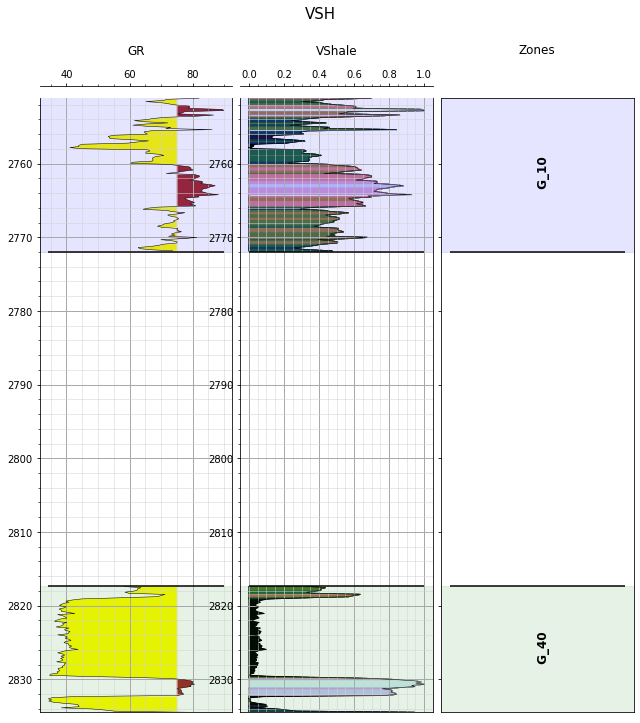

In [44]:
#Vshale

vsh = pp.vshale(method='clavier', show_plot=True, palette_op='cubehelix', figsize=(9, 10))

In [52]:
pd.concat(vsh).describe()

,DEPTH,GR,RT,NPHI,RHOB,VShale
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,2790.626270,61.311280,23.739285,0.312362,2.230614,0.358647
std,32.629749,17.297493,34.575916,0.080567,0.084614,0.283408
min,2751.124800,34.240000,2.000900,0.125000,2.051100,0.000000
25%,2760.611700,40.645000,2.965500,0.244050,2.164450,0.058190
50%,2770.098600,66.245000,4.233300,0.336950,2.223350,0.340910
75%,2825.000700,76.110000,45.724550,0.370075,2.303100,0.568091
max,2834.487600,89.870000,146.107500,0.450000,2.380200,1.000000


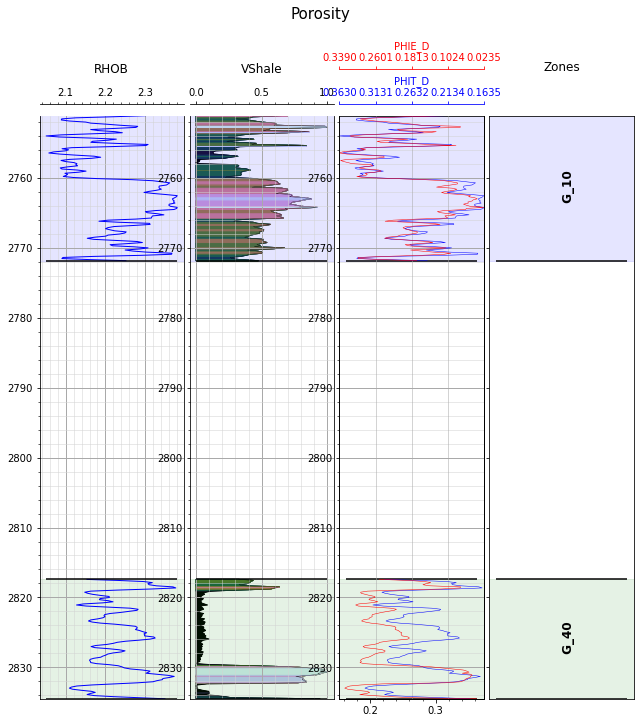

In [54]:
por = pp.porosity(method='density', show_plot=True, figsize=(9, 10))

In [55]:
pd.concat(por).describe()

,DEPTH,GR,RT,NPHI,RHOB,VShale,PHIT,PHIE
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,2790.626270,61.311280,23.739285,0.312362,2.230614,0.358647,0.254174,0.199833
std,32.629749,17.297493,34.575916,0.080567,0.084614,0.283408,0.051281,0.083963
min,2751.124800,34.240000,2.000900,0.125000,2.051100,0.000000,0.163515,0.023529
25%,2760.611700,40.645000,2.965500,0.244050,2.164450,0.058190,0.210242,0.126751
50%,2770.098600,66.245000,4.233300,0.336950,2.223350,0.340910,0.258576,0.213699
75%,2825.000700,76.110000,45.724550,0.370075,2.303100,0.568091,0.294273,0.272062
max,2834.487600,89.870000,146.107500,0.450000,2.380200,1.000000,0.362970,0.339019


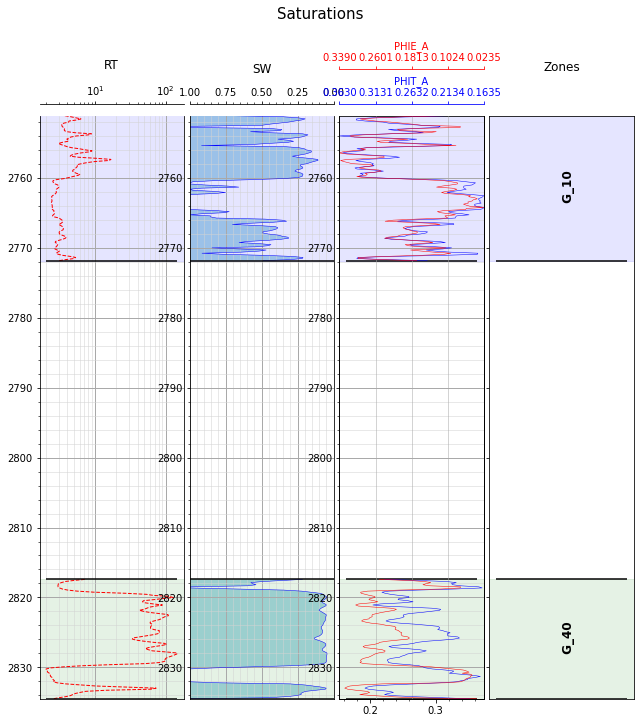

In [56]:
sw = pp.water_saturation(method='archie', rw=0.0211, show_plot=True, figsize=(9, 10))

In [57]:
pd.concat(sw).describe()

,DEPTH,GR,RT,NPHI,RHOB,VShale,PHIT,PHIE,SW,SH
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,2790.626270,61.311280,23.739285,0.312362,2.230614,0.358647,0.254174,0.199833,0.410559,0.589441
std,32.629749,17.297493,34.575916,0.080567,0.084614,0.283408,0.051281,0.083963,0.337873,0.337873
min,2751.124800,34.240000,2.000900,0.125000,2.051100,0.000000,0.163515,0.023529,0.046271,0.000000
25%,2760.611700,40.645000,2.965500,0.244050,2.164450,0.058190,0.210242,0.126751,0.096288,0.339215
50%,2770.098600,66.245000,4.233300,0.336950,2.223350,0.340910,0.258576,0.213699,0.299537,0.700463
75%,2825.000700,76.110000,45.724550,0.370075,2.303100,0.568091,0.294273,0.272062,0.660785,0.903712
max,2834.487600,89.870000,146.107500,0.450000,2.380200,1.000000,0.362970,0.339019,1.000000,0.953729


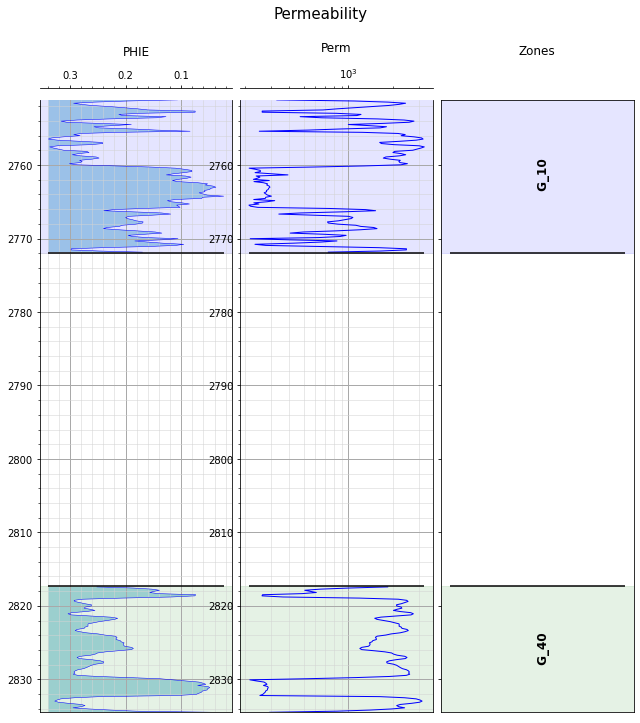

In [58]:
perm = pp.permeability(show_plot=True, figsize=(9,10))

In [59]:
pd.concat(perm).describe()

,DEPTH,GR,RT,NPHI,RHOB,VShale,PHIT,PHIE,SW,SH,Perm
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,2790.626270,61.311280,23.739285,0.312362,2.230614,0.358647,0.254174,0.199833,0.457882,0.542118,1377.385775
std,32.629749,17.297493,34.575916,0.080567,0.084614,0.283408,0.051281,0.083963,0.350681,0.350681,900.172566
min,2751.124800,34.240000,2.000900,0.125000,2.051100,0.000000,0.163515,0.023529,0.055173,0.000000,213.453511
25%,2760.611700,40.645000,2.965500,0.244050,2.164450,0.058190,0.210242,0.126751,0.114813,0.212085,393.108271
50%,2770.098600,66.245000,4.233300,0.336950,2.223350,0.340910,0.258576,0.213699,0.357165,0.642835,1401.851374
75%,2825.000700,76.110000,45.724550,0.370075,2.303100,0.568091,0.294273,0.272062,0.787915,0.885187,2195.174132
max,2834.487600,89.870000,146.107500,0.450000,2.380200,1.000000,0.362970,0.339019,1.000000,0.944827,3247.788471


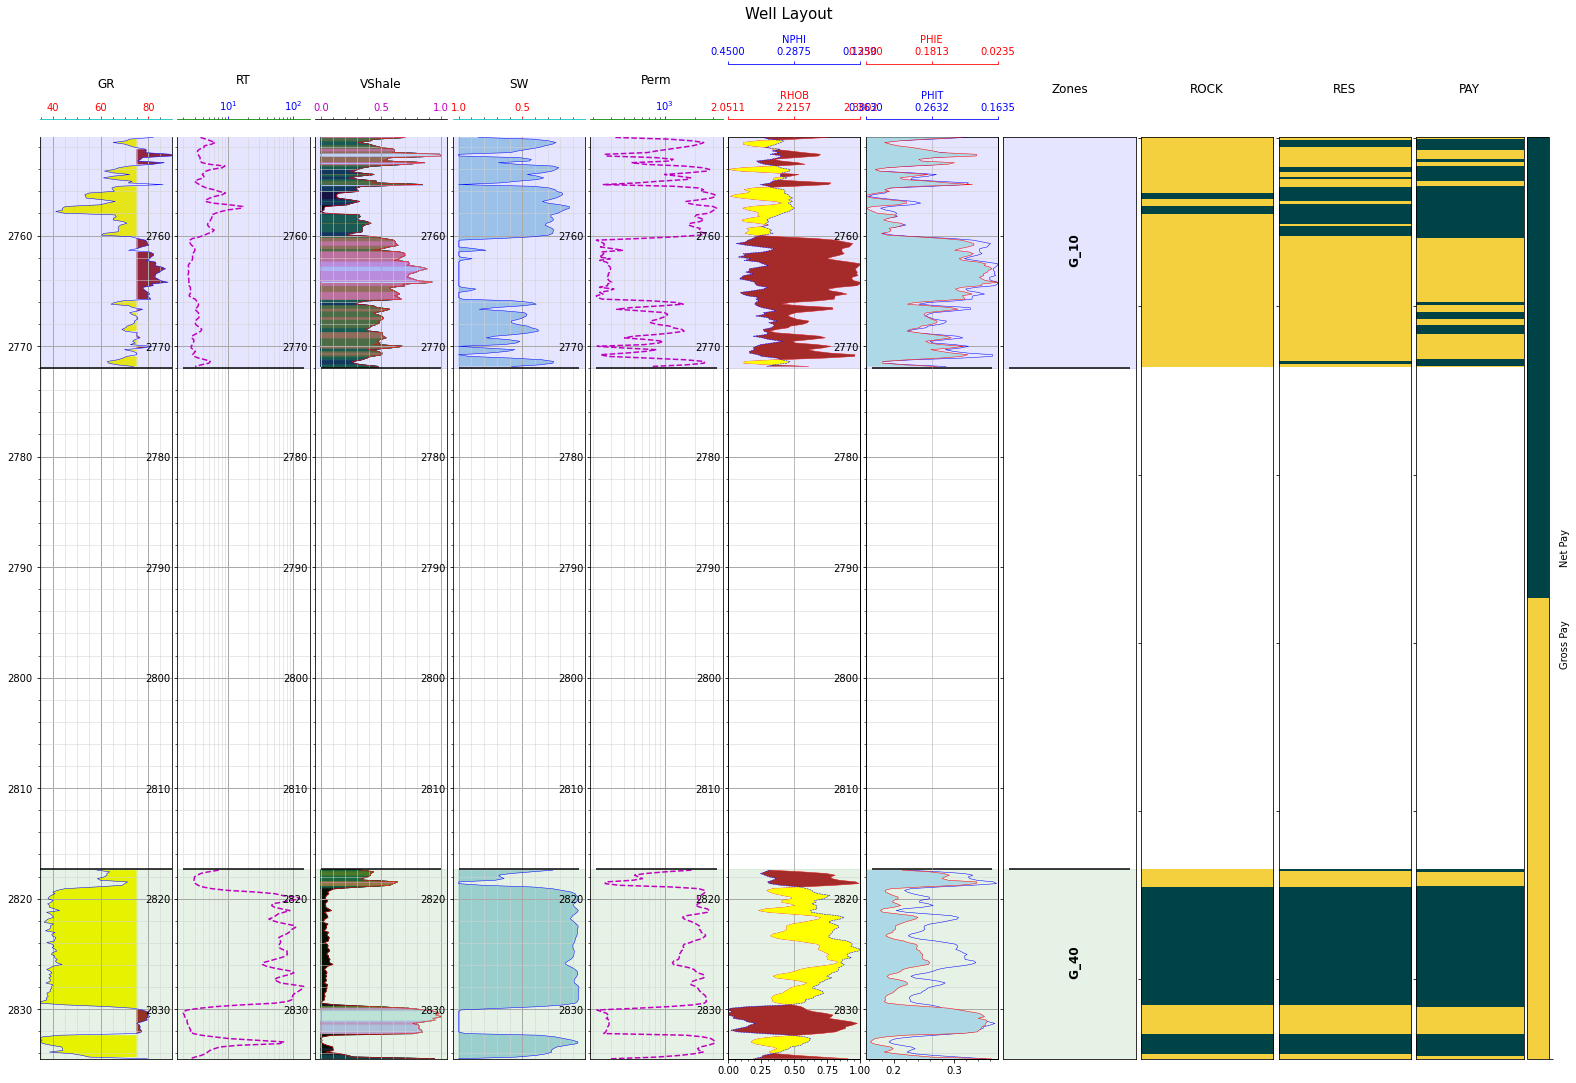

In [61]:
pay = pp.flags(vsh_cutoff=.18, por_cutoff=.25, sw_cutoff=0.5, show_plot=True, palette_op='cubehelix', figsize=(22, 15))

In [62]:
pd.concat(pay).describe()

,DEPTH,GR,RT,NPHI,RHOB,VShale,PHIT,PHIE,SW,SH,Perm,ROCK_NET_FLAG,RES_NET_FLAG,PAY_NET_FLAG
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,2790.626270,61.311280,23.739285,0.312362,2.230614,0.358647,0.254174,0.199833,0.457882,0.542118,1377.385775,0.364000,0.476000,0.604000
std,32.629749,17.297493,34.575916,0.080567,0.084614,0.283408,0.051281,0.083963,0.350681,0.350681,900.172566,0.482114,0.500426,0.490045
min,2751.124800,34.240000,2.000900,0.125000,2.051100,0.000000,0.163515,0.023529,0.055173,0.000000,213.453511,0.000000,0.000000,0.000000
25%,2760.611700,40.645000,2.965500,0.244050,2.164450,0.058190,0.210242,0.126751,0.114813,0.212085,393.108271,0.000000,0.000000,0.000000
50%,2770.098600,66.245000,4.233300,0.336950,2.223350,0.340910,0.258576,0.213699,0.357165,0.642835,1401.851374,0.000000,0.000000,1.000000
75%,2825.000700,76.110000,45.724550,0.370075,2.303100,0.568091,0.294273,0.272062,0.787915,0.885187,2195.174132,1.000000,1.000000,1.000000
max,2834.487600,89.870000,146.107500,0.450000,2.380200,1.000000,0.362970,0.339019,1.000000,0.944827,3247.788471,1.000000,1.000000,1.000000


In [67]:
#pay summary
summary = pp.paySummary(name='FRE-01')
summary

,Well,Zones,Flag Name,Top,Bottom,Unit,Gross,Net,Not Net,NTG,BVW,Average VShale,Average Porosity,Average Water Saturation
0,FRE-01,G_10,ROCK,2751.124800,2771.851200,m,20.726400,2.269314,18.457086,0.109489,0.066757,0.135640,0.308127,0.219903
1,FRE-01,G_10,RES,2751.124800,2771.851200,m,20.726400,10.892707,9.833693,0.525547,0.080527,0.335250,0.252419,0.338451
2,FRE-01,G_10,PAY,2751.124800,2771.851200,m,20.726400,10.892707,9.833693,0.525547,0.080527,0.335250,0.252419,0.338451
3,FRE-01,G_40,ROCK,2817.418800,2834.487600,m,17.068800,12.537260,4.531540,0.734513,0.028598,0.052326,0.260055,0.110860
4,FRE-01,G_40,RES,2817.418800,2834.487600,m,17.068800,13.292517,3.776283,0.778761,0.031482,0.069183,0.256836,0.127282
5,FRE-01,G_40,PAY,2817.418800,2834.487600,m,17.068800,13.292517,3.776283,0.778761,0.031482,0.069183,0.256836,0.127282


In [70]:
report = pp.report()
report

,
PHI Cutoff,0.180000
Porosity,Density
SH Cutoff,0.500000
VSH Cutoff,0.250000
VShale,Clavier
Water Saturation,Archie


In [71]:
#save file
report.to_excel('Pay Summary.xlsx', index=False)

# Plots

In [74]:
well_1 = Path(r"C:\Users\USER\Documents\Petrolib\data\15_9-F-1A.LAS")
well_2 = Path(r"C:\Users\USER\Documents\Python Scripts\halli\15_9-F-11A.LAS")

las = list() 
for well in [well_1, well_2]:
    las.append(load_las(well))

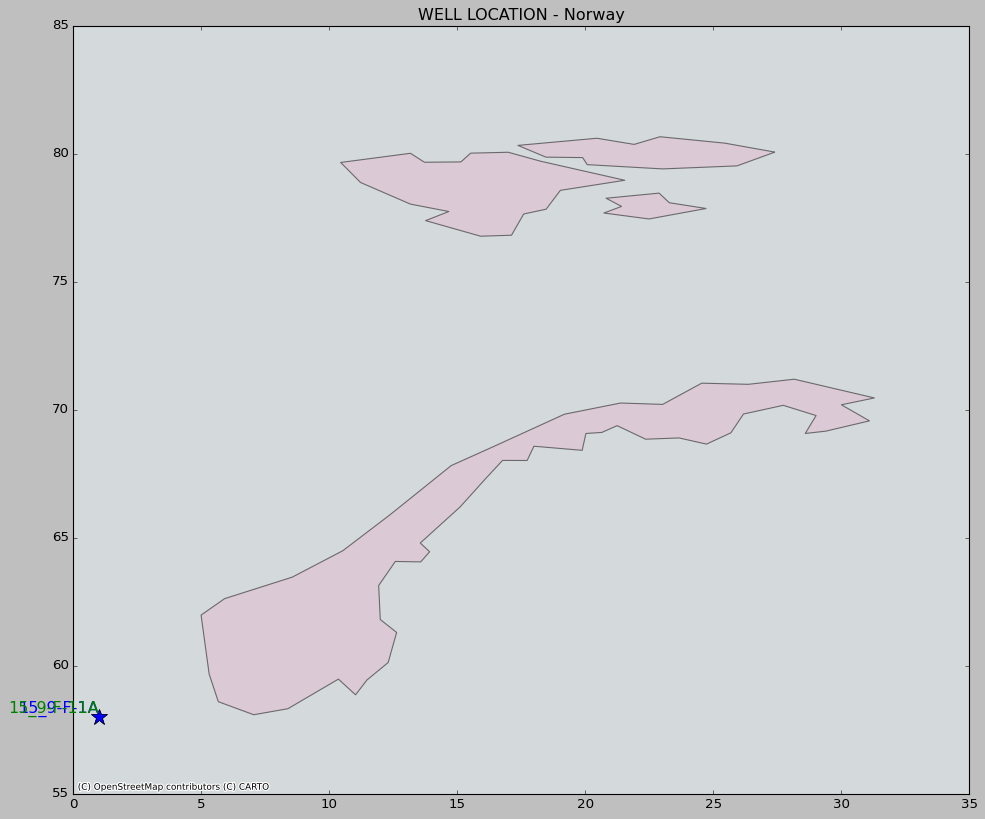

In [91]:
plotLoc(data=[l for l in las], area='Norway', label=['15_9-F-1A', '15_9-F-11A'], withmap=True, figsize=(20, 12))

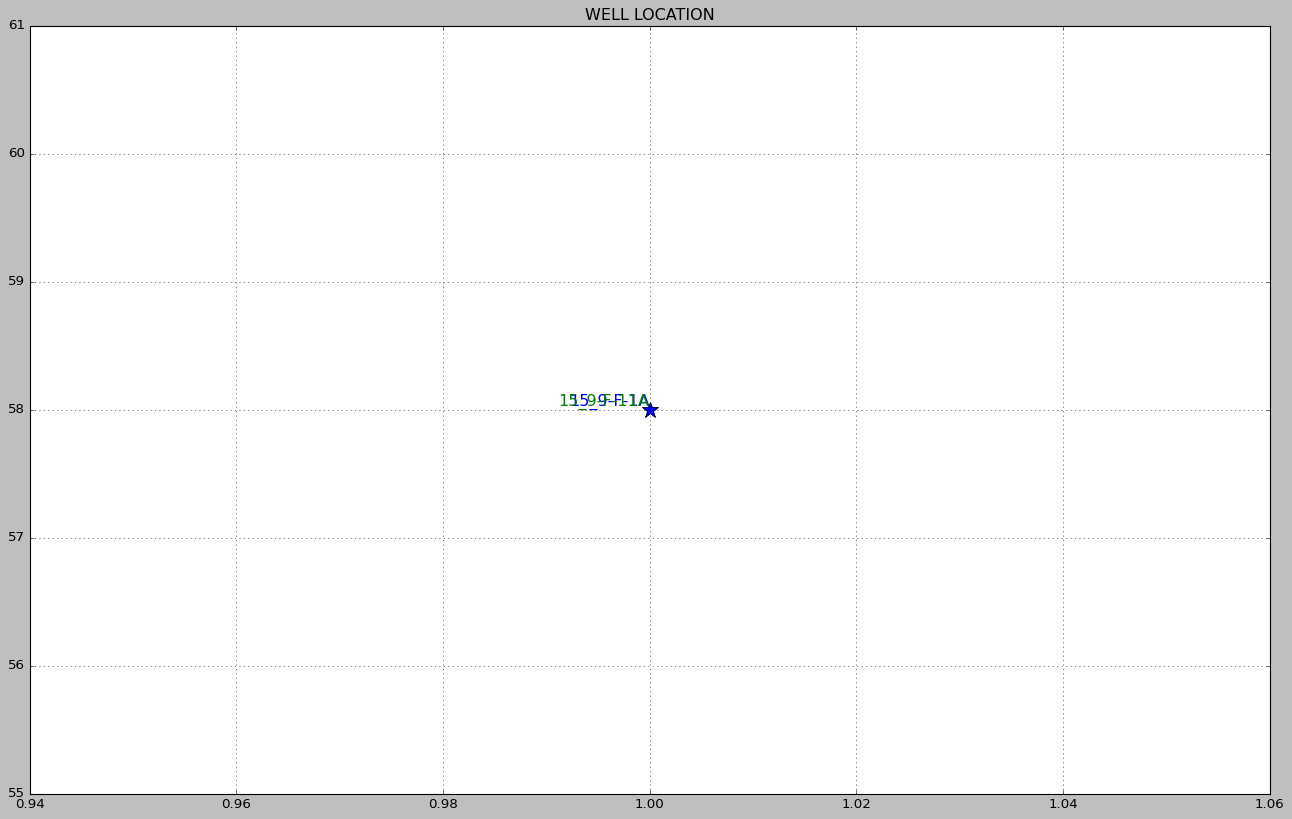

In [92]:
plotLoc(data=[l for l in las], label=['15_9-F-1A', '15_9-F-11A'], withmap=False, figsize=(20, 12))

In [186]:

def plotZoneCombo(data, depth, gr, res, nphi, rhob, ztop, zbot, ztops, zbots,
                   zonename, limit, palette_op=None, fill=None, title='Log plot', figsize=(10, 20)):
    #getting logs from dataframe
    depth_log = data[depth]
    gr_log = data[gr]
    res_log = data[res]
    nphi_log = data[nphi]
    rhob_log = data[rhob]

    # color-fill options
    span = abs(gr_log.min()-gr_log.max())
    if palette_op != None:
        cmap=plt.get_cmap(palette_op)
    else:
        pass
    color_index = np.arange(gr_log.min(), gr_log.max(), span/100)

    # create the subplots; ncols equals the number of logs
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=figsize, sharey=True)
    fig.suptitle(f'{title}', size=15, y=1.)

    #for GR track
    ax[0].minorticks_on()
    ax[0].grid(which='major', linestyle='-', linewidth=1, color='darkgrey')
    ax[0].yaxis.grid(which='minor', linestyle='-', linewidth=0.5, color='lightgrey')
    ax[0].plot(gr_log, depth_log, color='black', linewidth=1.0)
    ax[0].set_xlim(gr_log.min(), gr_log.max())
    ax[0].set_ylim(ztop, zbot)
    ax[0].invert_yaxis()
    ax[0].xaxis.label.set_color('black')
    ax[0].tick_params(axis='x', colors='black')
    ax[0].spines['top'].set_edgecolor('black')
    ax[0].set_xlabel('Gamma ray\nGR (gAPI)', color='black', labelpad=15)
    ax[0].spines["top"].set_position(("axes", 1.01))
    ax[0].xaxis.set_ticks_position("top")
    ax[0].xaxis.set_label_position("top")
    ax[0].hlines([t for t in ztops], xmin=gr_log.min(), xmax=gr_log.max(), colors='black', linestyles='solid',linewidth=1.)
    ax[0].hlines([b for b in zbots], xmin=gr_log.min(), xmax=gr_log.max(), colors='black', linestyles='solid', linewidth=1.)
    
    if palette_op == None:
        assert limit == None, 'Set limit to None'
        gr_base = (gr_log.max() - gr_log.min())/2
        ax[0].fill_betweenx(depth_log, gr_base, gr_log, where=gr_log<=gr_base, facecolor='yellow', linewidth=0)
        ax[0].fill_betweenx(depth_log, gr_log, gr_base, where=gr_log>=gr_base, facecolor='brown', linewidth=0)

    elif palette_op != None:
        assert limit != None, 'Set limit value. Can\'t be None'
        if limit == 'left':
            for index in sorted(color_index):
                index_value = (index-gr_log.min())/span
                palette = cmap(index_value)
                ax[0].fill_betweenx(depth_log, gr_log.min(), gr_log, where=gr_log>=index, color=palette)

        elif limit == 'right':
            for index in sorted(color_index):
                index_value = (index-gr_log.min())/span
                palette = cmap(index_value)
                ax[0].fill_betweenx(depth_log, gr_log.max(), gr_log, where=gr_log>=index, color=palette)


    #for resitivity
    ax[1].minorticks_on()
    ax[1].grid(which='major', linestyle='-', linewidth=1.0, color='darkgrey')
    ax[1].grid(which='minor', linestyle='-', linewidth=0.5, color='lightgrey')
    ax[1].yaxis.grid(which='minor', linestyle='-', linewidth=0.5, color='lightgrey')
    ax[1].semilogx(res_log, depth_log, color='red', linewidth=1.0, linestyle='--')
    ax[1].set_xlim(res_log.min(), res_log.max())
    ax[1].set_ylim(ztop, zbot)
    ax[1].invert_yaxis()
    ax[1].xaxis.label.set_color('red')
    ax[1].tick_params(axis='x', colors='red')
    ax[1].spines['top'].set_edgecolor('red')
    ax[1].set_xlabel('Resistivity\nILD (ohm.m)', labelpad=15)
    ax[1].spines["top"].set_position(("axes", 1.01))
    ax[1].xaxis.set_ticks_position("top")
    ax[1].xaxis.set_label_position("top")
    ax[1].fill_betweenx(depth_log, 10, res_log, where=res_log >= 10, interpolate=True, color='red', linewidth=0)
    ax[1].hlines([t for t in ztops], xmin=res_log.min(), xmax=res_log.max(), colors='black', linestyles='solid',linewidth=1.)
    ax[1].hlines([b for b in zbots], xmin=res_log.min(), xmax=res_log.max(), colors='black', linestyles='solid', linewidth=1.)
    
    #for nphi
    ax[2].minorticks_on()
    ax[2].yaxis.grid(which='major', linestyle='-', linewidth=1, color='darkgrey')
    ax[2].yaxis.grid(which='minor', linestyle='-', linewidth=0.5, color='lightgrey')
    ax[2].set_xticklabels([]);ax[2].set_xticks([])
    rhob_ = ax[2].twiny()
    rhob_.plot(rhob_log, depth_log, color='red', linewidth=1.)
    rhob_.set_xlim(rhob_log.min(), rhob_log.max())
    rhob_.set_ylim(ztop, zbot)
    rhob_.invert_yaxis()
    rhob_.xaxis.label.set_color('red')
    rhob_.tick_params(axis='x', colors='red')
    rhob_.spines['top'].set_edgecolor('red')
    rhob_.set_xlabel('Bulk Density\nRHOB (g/cm3)', color='red')
    rhob_.spines["top"].set_position(("axes", 1.01))
    rhob_.xaxis.set_ticks_position("top")
    rhob_.xaxis.set_label_position("top")
    rhob_.set_xticks(list(np.linspace(rhob_log.min(), rhob_log.max(), num=5, dtype='float32')))
    rhob_.hlines([t for t in ztops], xmin=rhob_log.min(), xmax=rhob_log.max(), colors='black', linestyles='solid',linewidth=1.)
    rhob_.hlines([b for b in zbots], xmin=rhob_log.min(), xmax=rhob_log.max(), colors='black', linestyles='solid', linewidth=1.)

    nphi_ = ax[2].twiny()
    nphi_.grid(which='major', linestyle='-', linewidth=0.5, color='darkgrey')
    nphi_.plot(nphi_log, depth_log, color='blue', linewidth=1.0, linestyle='--')
    nphi_.set_xlim(nphi_log.max(), nphi_log.min())
    nphi_.set_ylim(ztop, zbot)
    nphi_.invert_yaxis()
    # nphi_.invert_xaxis()
    nphi_.xaxis.label.set_color('blue')
    nphi_.tick_params(axis='x', colors='blue')
    nphi_.spines['top'].set_edgecolor('blue')
    nphi_.set_xlabel('Neutron Porosity\nNPHI (m3/m3)', color='blue')
    nphi_.spines["top"].set_position(("axes", 1.05))
    nphi_.xaxis.set_ticks_position("top")
    nphi_.xaxis.set_label_position("top")
    nphi_.set_xticks(list(np.linspace(nphi_log.min(), nphi_log.max(), num=5, dtype='float32')))
    nphi_.hlines([t for t in ztops], xmin=nphi_log.min(), xmax=nphi_log.max(), colors='black', linestyles='solid',linewidth=1.)
    nphi_.hlines([b for b in zbots], xmin=nphi_log.min(), xmax=nphi_log.max(), colors='black', linestyles='solid', linewidth=1.)
    #setting up the nphi and rhob fill
    #inspired from 
    x1=rhob_log
    x2=nphi_log
    
    x = np.array(rhob_.get_xlim())
    z = np.array(nphi_.get_xlim())

    nz=((x2-np.max(z))/(np.min(z)-np.max(z)))*(np.max(x)-np.min(x))+np.min(x)
    
    
    if fill == 'left':
        #shows only porous zones
        rhob_.fill_betweenx(depth_log, x1, nz, where=x1<=nz, interpolate=True, color='yellow', linewidth=0)
    elif fill == 'right':
        #shows only non-porous zones
        rhob_.fill_betweenx(depth_log, x1, nz, where=x1>=nz, interpolate=True, color='slategray', linewidth=0)
    elif fill == 'both':
        #shows both porous and non-porous zones
        rhob_.fill_betweenx(depth_log, x1, nz, where=x1<=nz, interpolate=True, color='lawngreen', linewidth=0)
        rhob_.fill_betweenx(depth_log, x1, nz, where=x1>=nz, interpolate=True, color='slategray', linewidth=0)

    #formation subplot
    ax[-1].set_ylim(ztop, zbot); ax[-1].invert_yaxis()
    ax[-1].set_title('Zones', pad=45)
    ax[-1].set_xticks([])
    # ax[-1].set_yticklabels([])
    ax[-1].set_xticklabels([])
    ax[-1].hlines([t for t in ztops], xmin=0, xmax=1, colors='black', linestyles='solid',linewidth=1.)
    ax[-1].hlines([b for b in zbots], xmin=0, xmax=1, colors='black', linestyles='solid', linewidth=1.)
    formations = ax[-1]

    #delineating zones
    np.random.seed(2)
    cycol = cycle('bgrcymk')
    color = [choice(next(cycol)) for i in range(len(ztops))]
    np.random.shuffle(color)
    for i in ax:
        for t,b, c in zip(ztops, zbots, color):
            i.axhspan(t, b, color=c, alpha=.3)

    #adding zone names
    fm_mid = []
            
    for t, b in zip(ztops, zbots):
            fm_mid.append((t+(b-t)/2))
    
    for label, fm_mids in zip(zonename, fm_mid):
        formations.text(0.5, fm_mids, label, rotation=0,
                verticalalignment='center', fontweight='bold',
                fontsize='large')
            
    plt.tight_layout(h_pad=1.2)
    fig.subplots_adjust(wspace = 0.0)


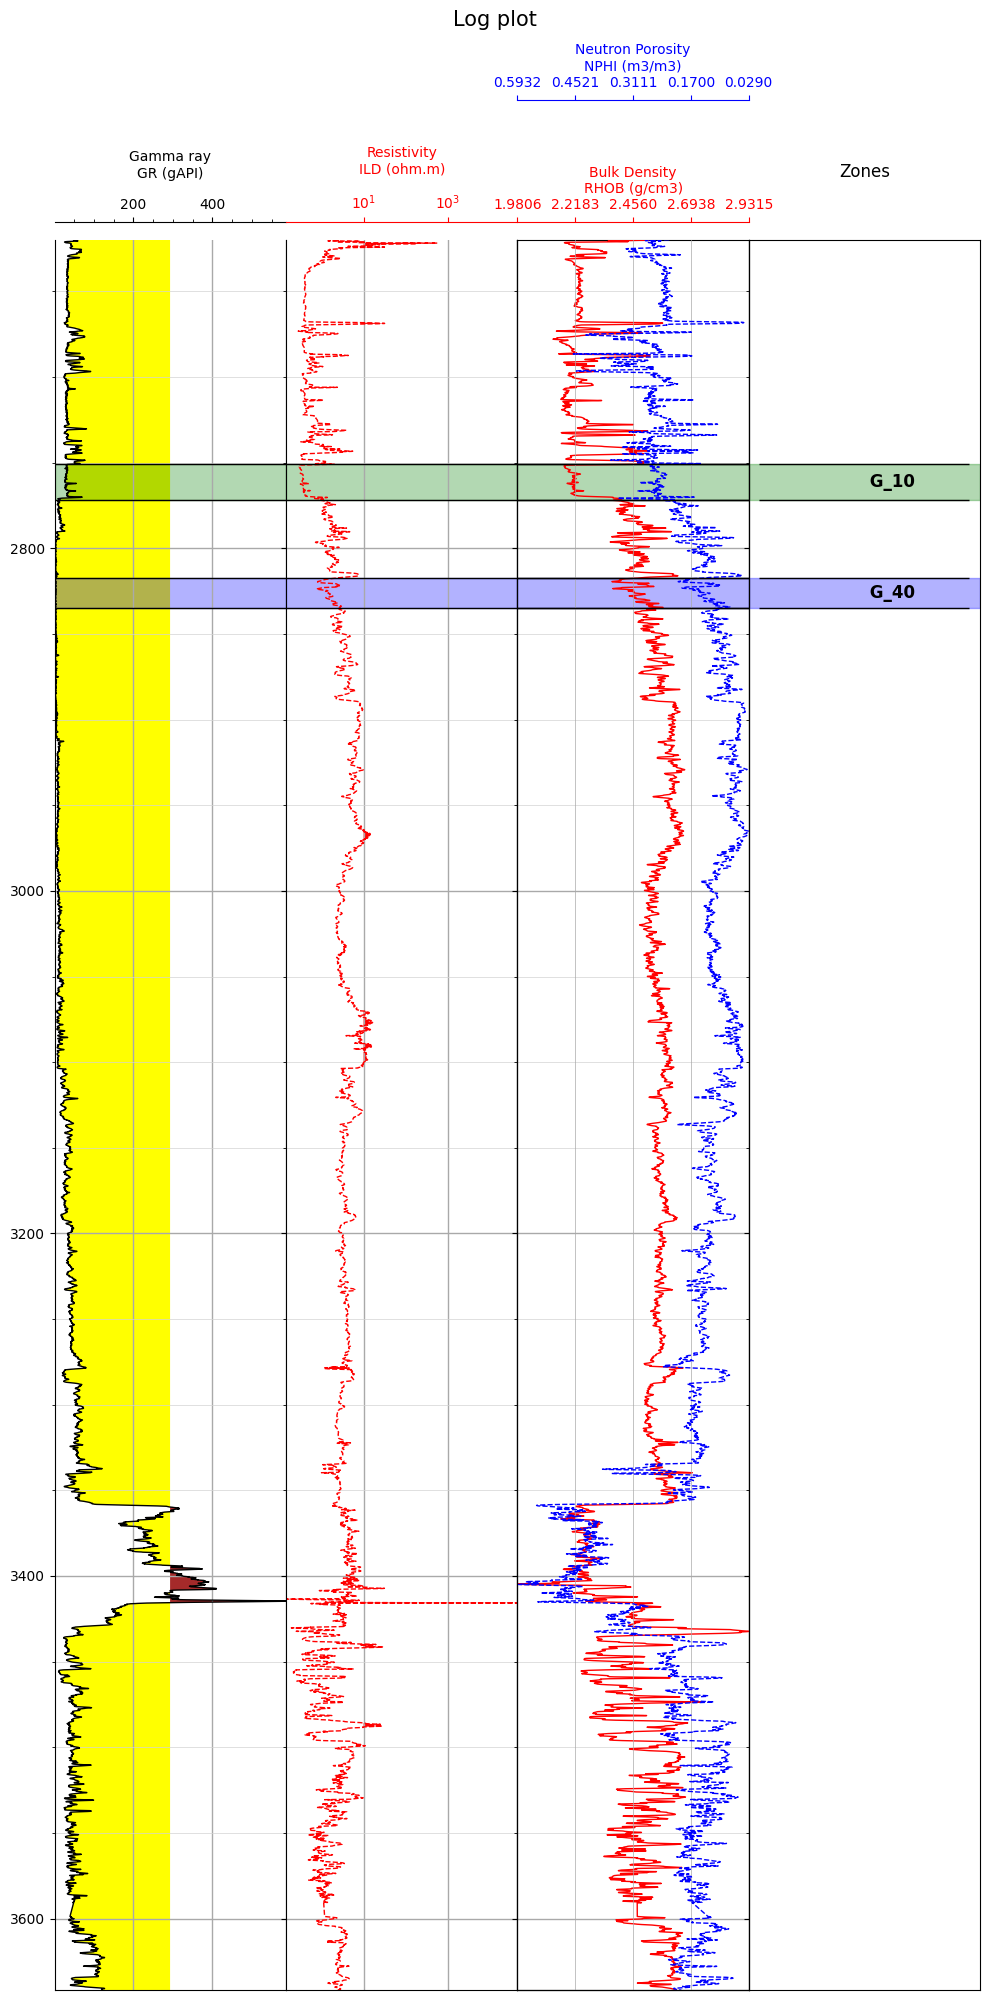

In [187]:
plotZoneCombo(df, 'DEPTH', 'GR', 'RT', 'NPHI', 'RHOB', ztop=df.DEPTH.min(), zbot=df.DEPTH.max(), ztops=ztop, zbots=zbot, zonename=zn, limit=None)

In [180]:
well_path = Path(r"./15_9-F-1A.LAS")
df, las = load_las(well_path, return_csv=True)

#reset index
df = df.dropna().reset_index()
df.head()

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,NPHI,PEF,RACEHM,RACELM,RHOB,ROP,RPCEHM,RPCELM,RT
0,2619.8,2.5538,2.5712,2.5055,2.5014,8.5,8.5000,0.0486,87.3753,181.3741,48.4883,0.2229,7.2445,1.0050,0.8472,2.4901,13.8923,1.9548,1.3111,1.9548
1,2619.9,2.5862,2.5705,2.5124,2.5291,8.5,8.5000,0.0648,86.7117,181.2219,49.9066,0.2333,7.2138,1.0786,0.8462,2.5158,13.7831,2.3321,1.4104,2.3321
2,2620.0,2.6059,2.5383,2.4906,2.5423,8.5,8.5001,0.0798,86.0484,181.0697,48.4469,0.2479,7.0271,1.1140,0.8361,2.5199,6.5390,2.6895,1.4836,2.6895
3,2620.1,2.6061,2.4878,2.4524,2.5420,8.5,8.5233,0.0881,85.5393,180.8952,51.7540,0.2613,6.7356,1.1309,0.8232,2.5033,6.5414,2.6885,1.4956,2.6885
4,2620.2,2.5830,2.4354,2.4148,2.5326,8.5,8.5000,0.0882,85.2690,180.6865,53.4699,0.2776,6.4257,1.1926,0.8138,2.4735,6.5439,2.4076,1.4650,2.4076


In [3]:
df = process_data(df, 'GR', 'RT', 'NPHI', 'RHOB')

In [4]:
df_litho = pd.read_csv('Litho info.csv')
df_litho

,lith,lith_num,hatch,color
0,Sandstone,1,..,#ffff00
1,Sandstone/Shale,2,-.,#ffe119
2,Shale,3,--,#bebebe
3,Marl,4,NaN,#7cfc00
4,Dolomite,5,-/,#8080ff
5,Limestone,6,+,#80ffff
6,Chalk,7,..,#80ffff
7,Halite,8,x,#7ddfbe
8,Anhydrite,9,NaN,#ff80ff
9,Tuff,10,||,#ff8c00


In [5]:
#modelling facies in the north sea
litho = []
for i, j in zip(df['DEPTH'], df['GR']):
    if i >= 2600 and i <=2770:
        if j > 50.0:
            litho.append('Sandstone/Shale')
        else:
            litho.append('Sandstone')
    elif i >2770 and i <= 3320:
        if j < 30:
            litho.append('Limestone')
        else:
            litho.append('Dolomite')
    elif i > 3320 and i <= 3440:
        litho.append('Shale')
    elif i > 3440:
        litho.append('Sandstone')

df['litho'] = litho

In [8]:
df.litho.value_counts()

Limestone          3951
Sandstone          3191
Dolomite           1549
Shale              1193
Sandstone/Shale     252
Name: litho, dtype: int64

In [ ]:
# %matplotlib widget
plotLog(df, 'DEPTH', [['GR', 'BS']], top=df.DEPTH.min(),
       bottom=df.DEPTH.max(), figsize=(5, 12))

In [181]:
from typing import List
from matplotlib import pyplot as plt
from itertools import cycle
from random import choice
from matplotlib import pyplot as plt
from typing import *
from random import choice
from matplotlib.patches import Patch 
from pathlib import Path
import numpy as np
import lasio
import csv
import pandas as pd



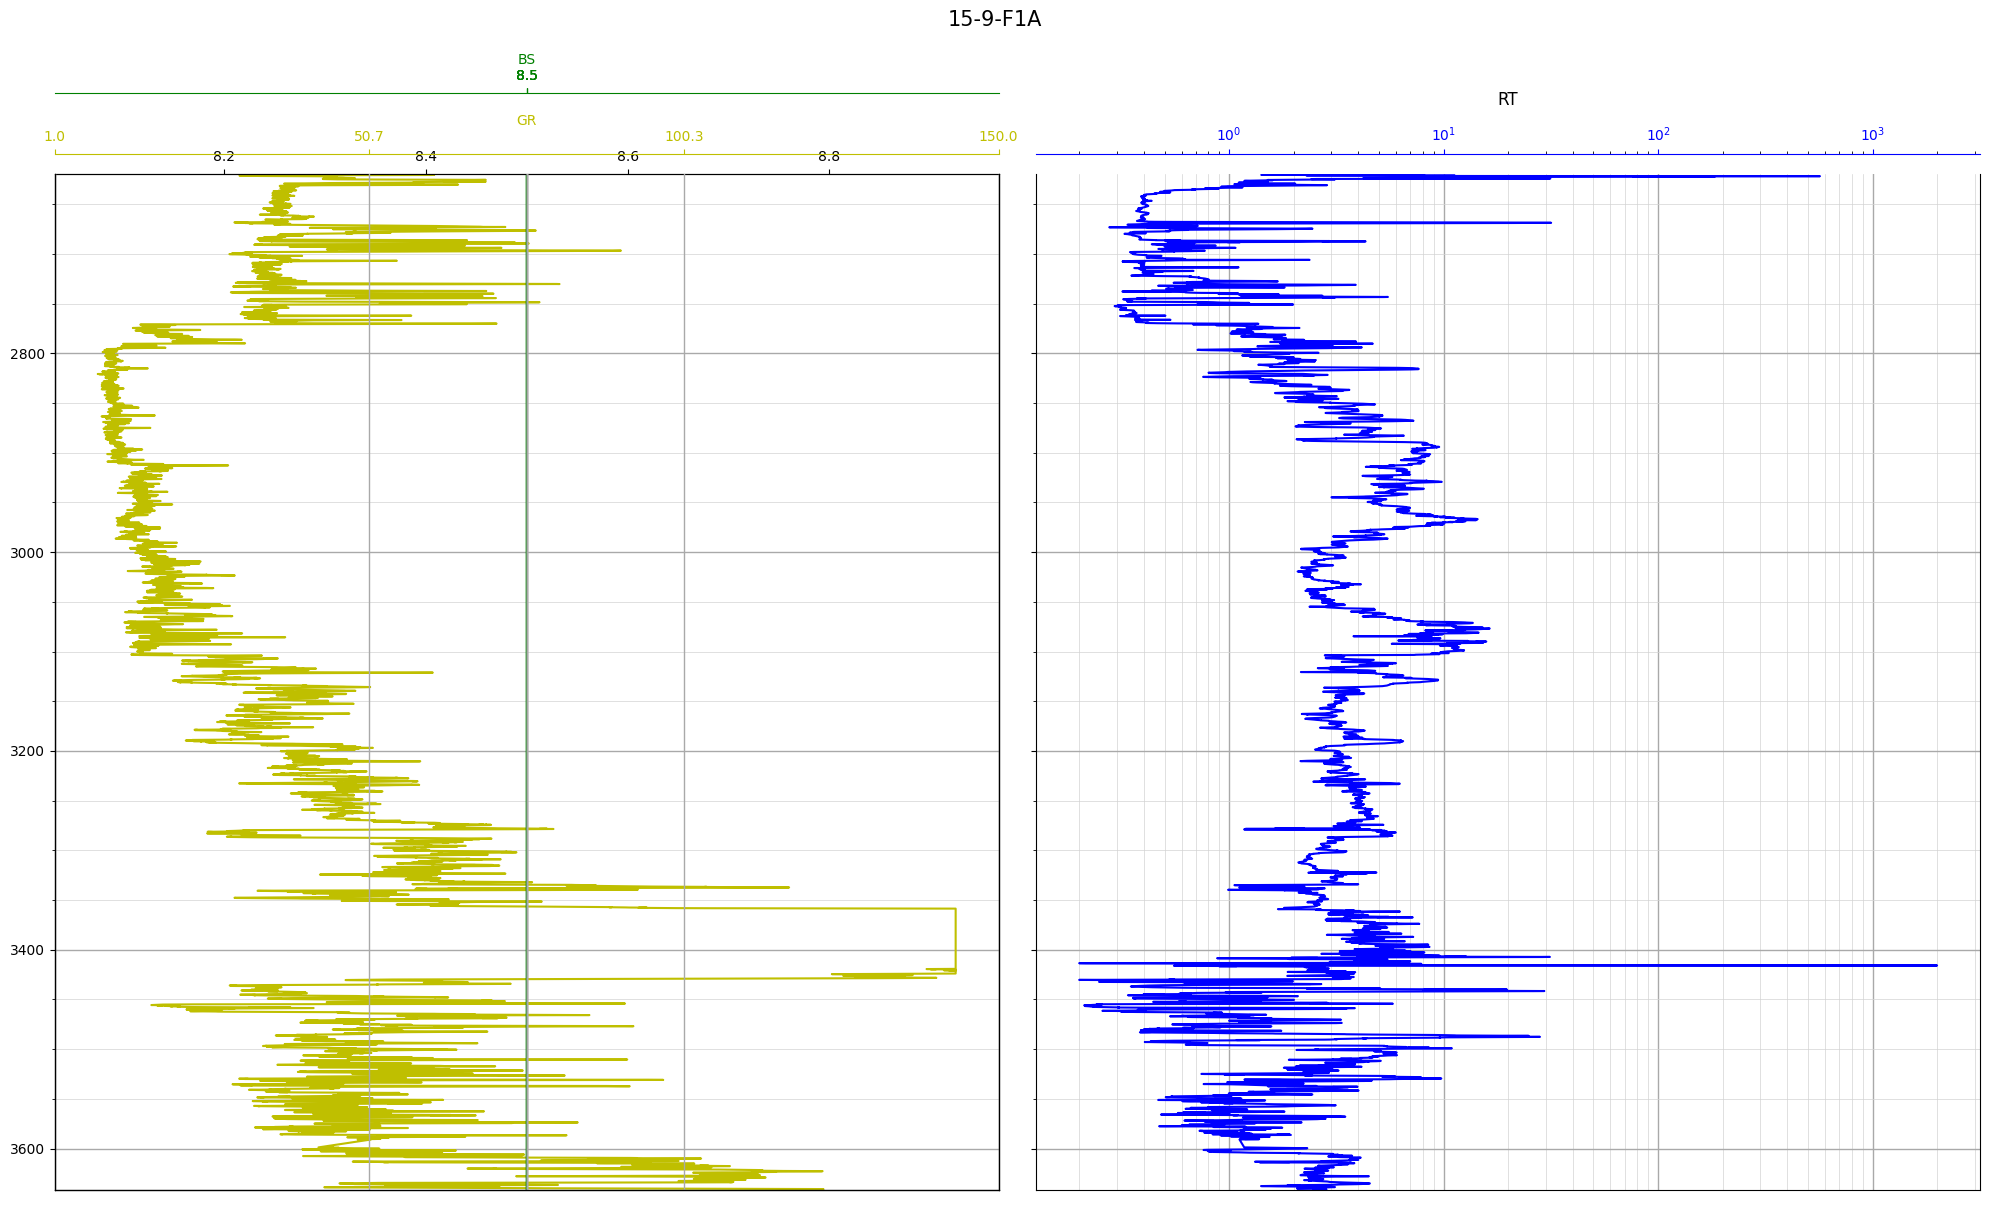

In [176]:
# %matplotlib widget
plotLogFacies(df, 'DEPTH', [['GR', 'BS'], 'RT'], facies=None, top=df.DEPTH.min(),
                            bottom=df.DEPTH.max(), figsize=(20, 12), title='15-9-F1A')

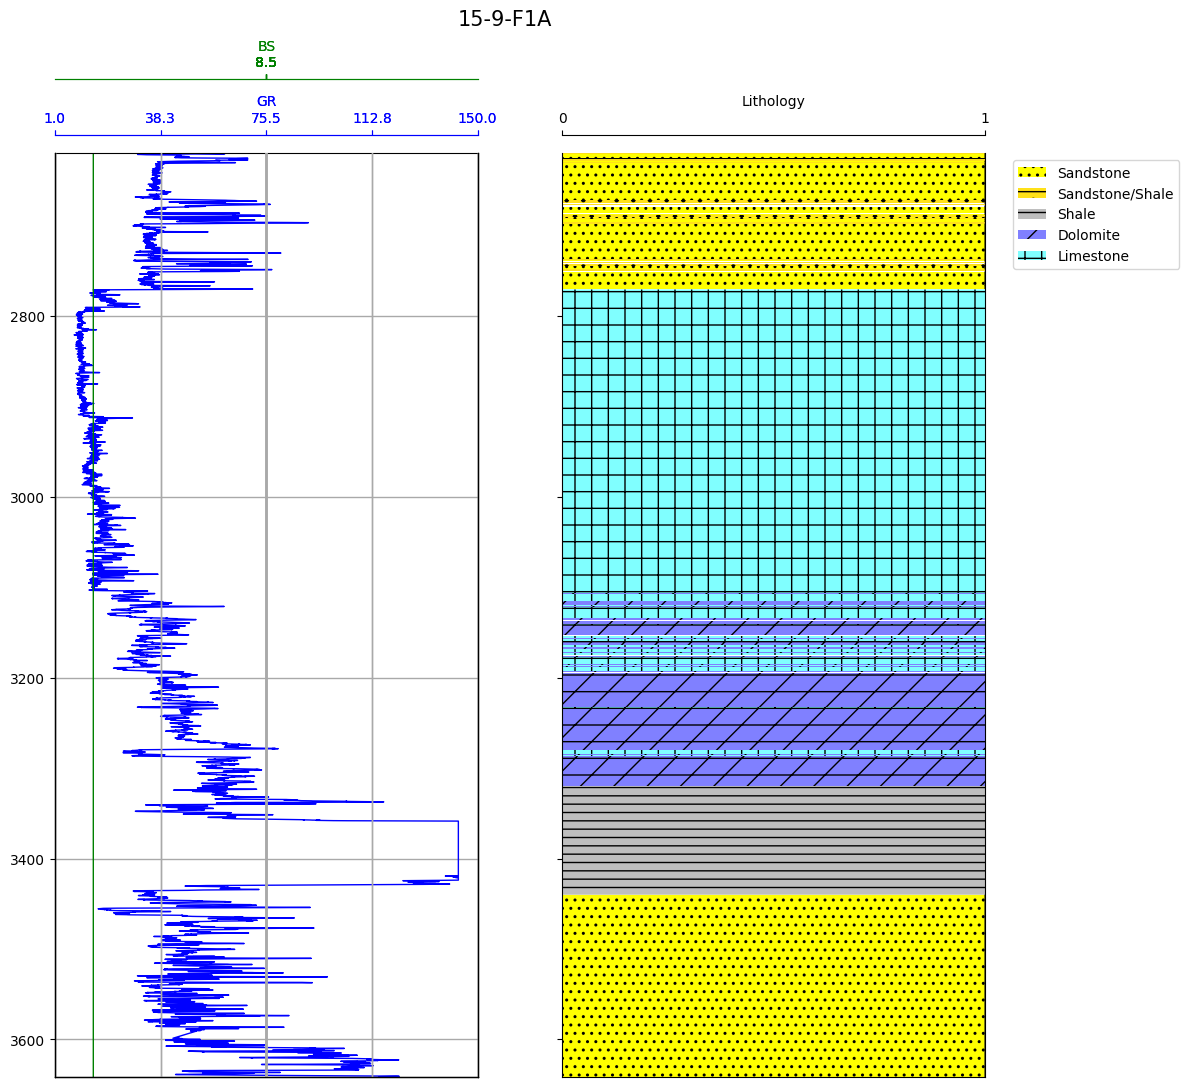

In [166]:
# %matplotlib widget
plotLogFacies(df, 'DEPTH', [['GR', 'BS']], facies='litho', top=df.DEPTH.min(),
       bottom=df.DEPTH.max(), figsize=(12, 12), title='15-9-F1A')

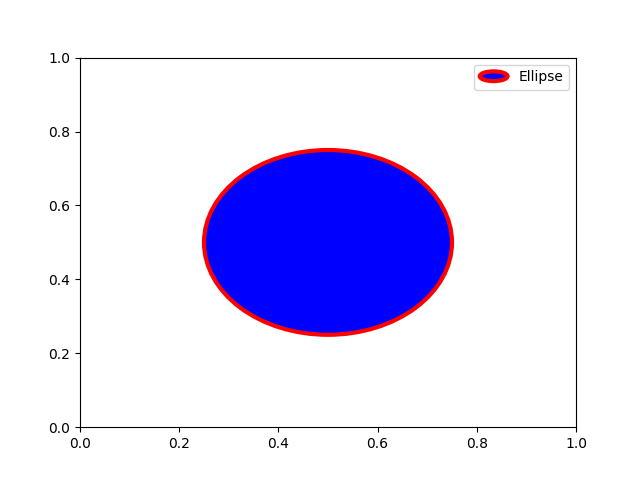

In [113]:
#custom patchs
from matplotlib.legend_handler import HandlerPatch
import matplotlib.patches as mpatches


class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=width + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]


c = mpatches.Circle((0.5, 0.5), 0.25, facecolor="blue",
                    edgecolor="red", linewidth=3)

fig, ax = plt.subplots()

ax.add_patch(c)
ax.legend([c], ["Ellipse"],
          handler_map={mpatches.Circle: HandlerEllipse()})
